In [4]:
import pandas as pd
import seaborn as sns
import numpy as np

penguins = pd.read_csv('penguins_regression.csv')
penguins.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


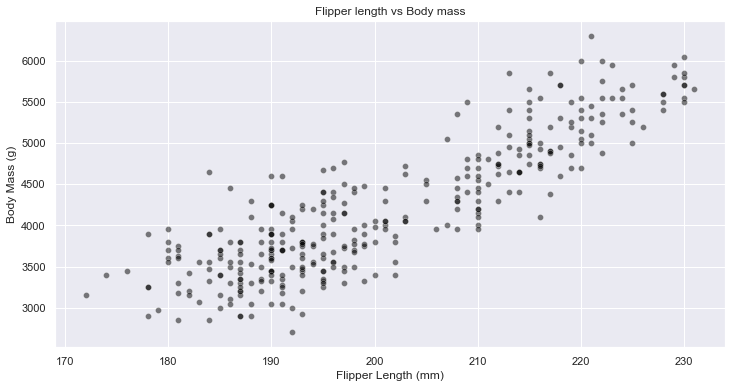

In [5]:
# Plots data
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]

sns.set(rc = {'figure.figsize':(12,6)})
ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name, color="black", alpha=0.5)

_ = ax.set_title('Flipper length vs Body mass')

In [6]:
# Basic linear model
def linear_model_flipper_mass(flipper_length, weight_flipper_length,
                              intercept_body_mass):
    """Linear model of the form y = a * x + b"""
    body_mass = weight_flipper_length * flipper_length + intercept_body_mass
    return body_mass

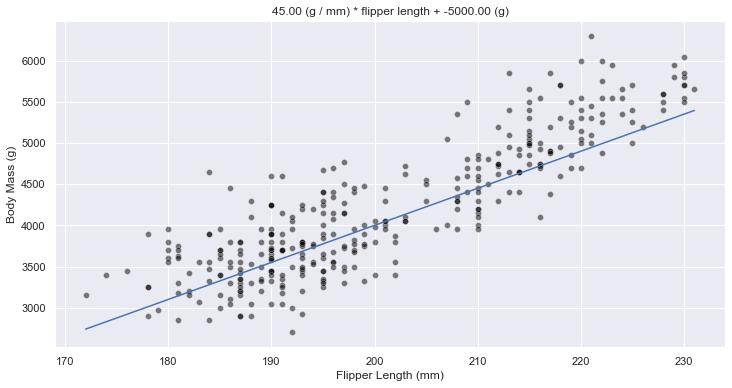

In [7]:
# calculates output from basic linear model

weight_flipper_length = 45
intercept_body_mass = -5000

flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

label = "{0:.2f} (g / mm) * flipper length + {1:.2f} (g)"

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

The body mass for a flipper length of 180 mm is 7200 g and 7240 g for a flipper length of 181 mm


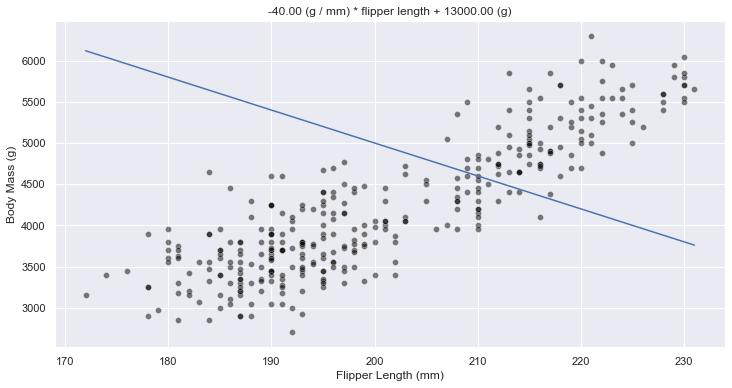

In [9]:
# Changing weight and intercept

weight_flipper_length = -40
intercept_body_mass = 13000

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

body_mass_180 = linear_model_flipper_mass(
    flipper_length=180, weight_flipper_length=40, intercept_body_mass=0)
body_mass_181 = linear_model_flipper_mass(
    flipper_length=181, weight_flipper_length=40, intercept_body_mass=0)

print(f"The body mass for a flipper length of 180 mm "
      f"is {body_mass_180} g and {body_mass_181} g "
      f"for a flipper length of 181 mm")

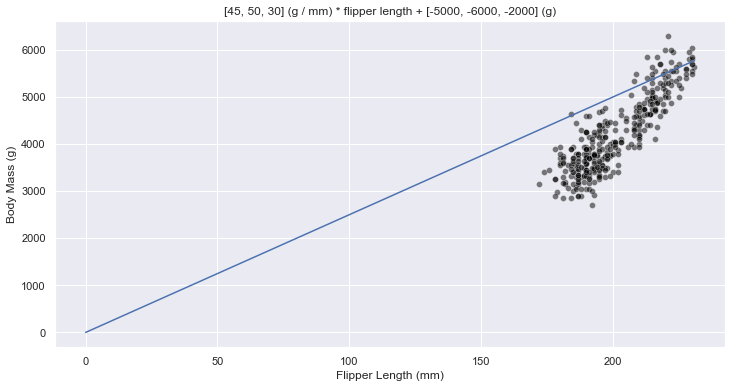

In [13]:
# Changing weight and intercept
weight_flipper_length = 25
intercept_body_mass = 0

# redefined the flipper length to start at 0 to plot the intercept value
flipper_length_range = np.linspace(0, data.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

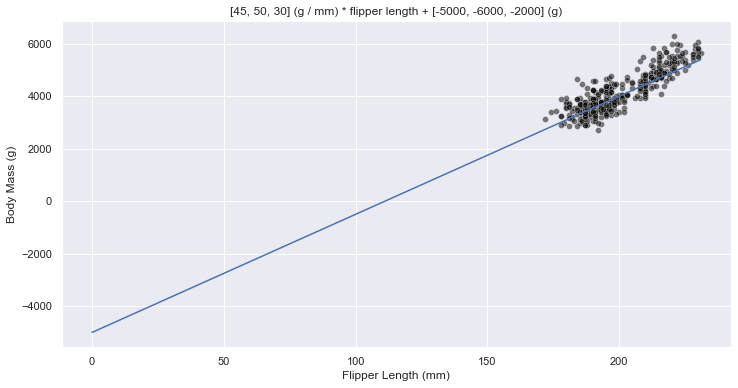

In [14]:
# Changing weight and intercept
weight_flipper_length = 45
intercept_body_mass = -5000

predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weight_flipper_length, intercept_body_mass)

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label.format(weight_flipper_length, intercept_body_mass))

### Calculating error

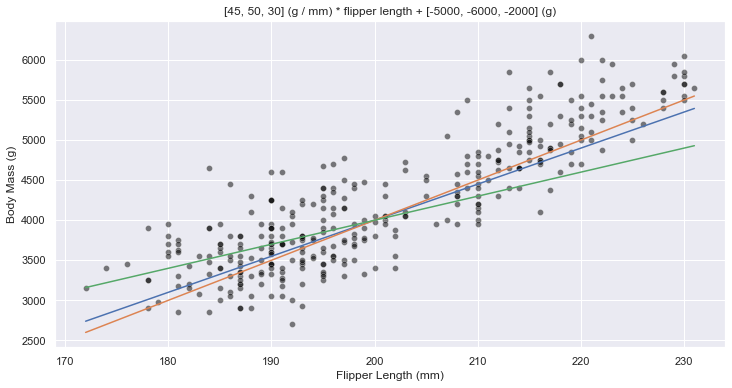

In [15]:
weights = [45, 50, 30]
intercepts = [-5000, -6000, -2000]
flipper_length_range = np.linspace(data.min(), data.max(), num=300)
predicted_body_mass = linear_model_flipper_mass(
    flipper_length_range, weights, intercepts)

label = f"{weights} (g / mm) * flipper length + {intercepts} (g)"

ax = sns.scatterplot(data=penguins, x=feature_name, y=target_name,
                     color="black", alpha=0.5)
ax.plot(flipper_length_range, predicted_body_mass)
_ = ax.set_title(label)

In [16]:
# Error function
def error(true_values, predictions):
    errors = np.ravel(true_values) - np.ravel(predictions)
    return np.mean(np.abs(errors))

In [17]:
for model_idx, (weight, intercept) in enumerate(zip(weights, intercepts)):
    target_predicted = linear_model_flipper_mass(data, weight, intercept)
    print(f"Model #{model_idx}:")
    print(f"{weight} (g / mm) * flipper length + {intercept} (g)")
    print(f"Error: {error(target, target_predicted):.2f}\n")

Model #0:
45 (g / mm) * flipper length + -5000 (g)
Error: 338.52

Model #1:
50 (g / mm) * flipper length + -6000 (g)
Error: 329.24

Model #2:
30 (g / mm) * flipper length + -2000 (g)
Error: 404.62

